# WeatherPy
----


In [152]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [153]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90, high=90, size=1500)
lng = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [154]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [155]:
# set up lists to hold reponse info
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | oktyabrskiy
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | soavinandriana
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | byron bay
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | surt
Processing Record 15 of Set 1 | akdepe
Processing Record 16 of Set 1 | galiwinku
City not found. Skipping...
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | kampot
Processing Record 20 of Set 1 | gogrial
Processing Record 21 of Set 1 | mizoch
Processing Record 22 of Set 1 | mataura
Processin

Processing Record 41 of Set 4 | paita
Processing Record 42 of Set 4 | port lincoln
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | saint-augustin
Processing Record 45 of Set 4 | hofn
Processing Record 46 of Set 4 | plettenberg bay
Processing Record 47 of Set 4 | tessalit
Processing Record 48 of Set 4 | high level
Processing Record 49 of Set 4 | alofi
Processing Record 50 of Set 4 | motihari
Processing Record 1 of Set 5 | villamontes
Processing Record 2 of Set 5 | port hawkesbury
Processing Record 3 of Set 5 | karakendzha
City not found. Skipping...
Processing Record 4 of Set 5 | susanville
Processing Record 5 of Set 5 | kualakapuas
Processing Record 6 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 5 | olinda
Processing Record 8 of Set 5 | chokurdakh
Processing Record 9 of Set 5 | cabedelo
Processing Record 10 of Set 5 | great yarmouth
Processing Record 11 of Set 5 | aykhal
Processing Record 12 of Set 5 | hokitika
Processing Record 1

Processing Record 28 of Set 8 | saint-joseph
Processing Record 29 of Set 8 | selcuk
Processing Record 30 of Set 8 | christchurch
Processing Record 31 of Set 8 | toamasina
Processing Record 32 of Set 8 | ibotirama
Processing Record 33 of Set 8 | mpika
Processing Record 34 of Set 8 | laguna
Processing Record 35 of Set 8 | khani
Processing Record 36 of Set 8 | atocha
Processing Record 37 of Set 8 | marawi
Processing Record 38 of Set 8 | asosa
Processing Record 39 of Set 8 | isetskoye
Processing Record 40 of Set 8 | bengkulu
Processing Record 41 of Set 8 | bambous virieux
Processing Record 42 of Set 8 | shetpe
Processing Record 43 of Set 8 | saint-georges
Processing Record 44 of Set 8 | jalu
Processing Record 45 of Set 8 | trairi
Processing Record 46 of Set 8 | troitsko-pechorsk
Processing Record 47 of Set 8 | nemuro
Processing Record 48 of Set 8 | matadi
Processing Record 49 of Set 8 | ostrovnoy
Processing Record 50 of Set 8 | nchelenge
Processing Record 1 of Set 9 | nehe
Processing Recor

Processing Record 14 of Set 12 | gravdal
Processing Record 15 of Set 12 | guiratinga
Processing Record 16 of Set 12 | wau
Processing Record 17 of Set 12 | logan lake
Processing Record 18 of Set 12 | arlit
Processing Record 19 of Set 12 | lolua
City not found. Skipping...
Processing Record 20 of Set 12 | roanoke rapids
Processing Record 21 of Set 12 | linguere
Processing Record 22 of Set 12 | japura
Processing Record 23 of Set 12 | iqaluit
Processing Record 24 of Set 12 | morehead
Processing Record 25 of Set 12 | broome
Processing Record 26 of Set 12 | kilindoni
Processing Record 27 of Set 12 | tarrafal
Processing Record 28 of Set 12 | cabo san lucas
Processing Record 29 of Set 12 | anadyr
Processing Record 30 of Set 12 | ponferrada
Processing Record 31 of Set 12 | dranceni sat
City not found. Skipping...
Processing Record 32 of Set 12 | laureles
Processing Record 33 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 34 of Set 12 | plastun
Processing Record 35 of Set 1

In [156]:
len(lat)
len(temp)

617

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [157]:
#Create a dataframe
weatherPy = pd.DataFrame({"City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp_max,
    "Wind Speed": wind_speed})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
weatherPy = weatherPy.dropna(how="any")
print(weatherPy.count())

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Latitude      563
Longitude     563
Max Temp      563
Wind Speed    563
dtype: int64


In [158]:
# Save dataframe as CSV
weatherPy.to_csv("./output_data/weatherPy.csv")
weatherPy.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,barrow,100.0,US,1.660445e+09,80.0,71.2906,-156.7887,35.62,0.00
1,hamilton,20.0,US,1.660445e+09,71.0,39.1834,-84.5333,74.25,3.44
2,thompson,0.0,CA,1.660445e+09,45.0,55.7435,-97.8558,66.36,3.44
3,arraial do cabo,61.0,BR,1.660445e+09,72.0,-22.9661,-42.0278,68.95,21.99
4,oktyabrskiy,85.0,RU,1.660445e+09,63.0,54.4815,53.4710,62.15,6.02


In [159]:
# Check if any cities have humidity greater than 100%
weatherPy["Humidity"].unique()

array([ 80.,  71.,  45.,  72.,  63.,  94.,  85.,  76.,  78.,  38.,  44.,
        73.,  65.,  27.,  84.,  81.,  98.,  97.,  59.,  70.,  77.,  74.,
        83.,  66.,  93.,  33.,  53.,  64.,  86.,  99.,  30.,  48.,  69.,
        54.,  50.,  60.,  67., 100.,  88.,  87.,  75.,  90.,  52.,  57.,
        68.,  92.,  42.,  36.,  26.,  39.,  62.,  96.,  25.,  37.,  56.,
        61.,  82.,  79.,  89.,  28.,  91.,  43.,  55.,  46.,  23.,  29.,
        14.,  58.,  40.,  19.,  32.,  47.,  95.,  34.,  24.,   1.,  31.,
        13.,  41.,  49.,  20.,  22.,  17.])

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

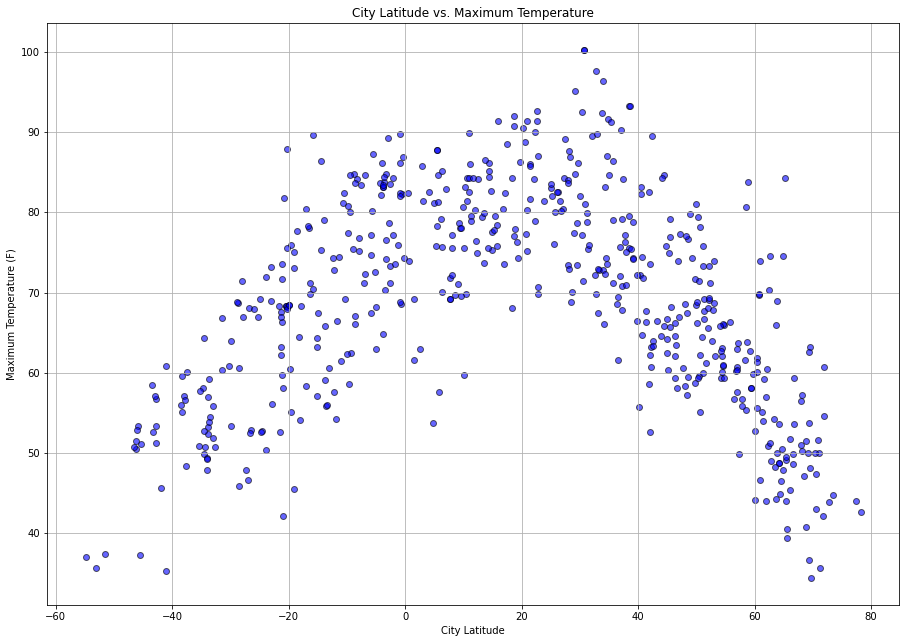

In [160]:
#Analysis 1: Maximum Temperature (F) vs. Latitude
fig, ax = plt.subplots(figsize=(15.27, 10.7))
ax.scatter(weatherPy['Latitude'], weatherPy['Max Temp'], c='blue',alpha=.6, linewidth=1, edgecolor='black')

# Create a scatter plot for latitude vs max temperature.
ax.set_xlabel("City Latitude")
ax.set_ylabel("Maximum Temperature (F)")
ax.set_title("City Latitude vs. Maximum Temperature")

# Save png images for each scatter plot.
plt.savefig("Latitude vs. Maximum_Temperature.png")
plt.grid()
plt.show()

The City Latitude vs. Maximum Temperature scatter plot above shows a city's maximum temperature in relation to its latitude. It shows that cities with the highest maximum temperatures are closest to the equator ( represented on the scatter plot as Latitude of 0). As the City Latitude gets further away from 0, the max temperature starts to decrease. So from this observation it can be concluded that the hottest temperatures for a city are higher the closer that city is to the equator and lower the farther that city is from the equator.

## Latitude vs. Humidity Plot

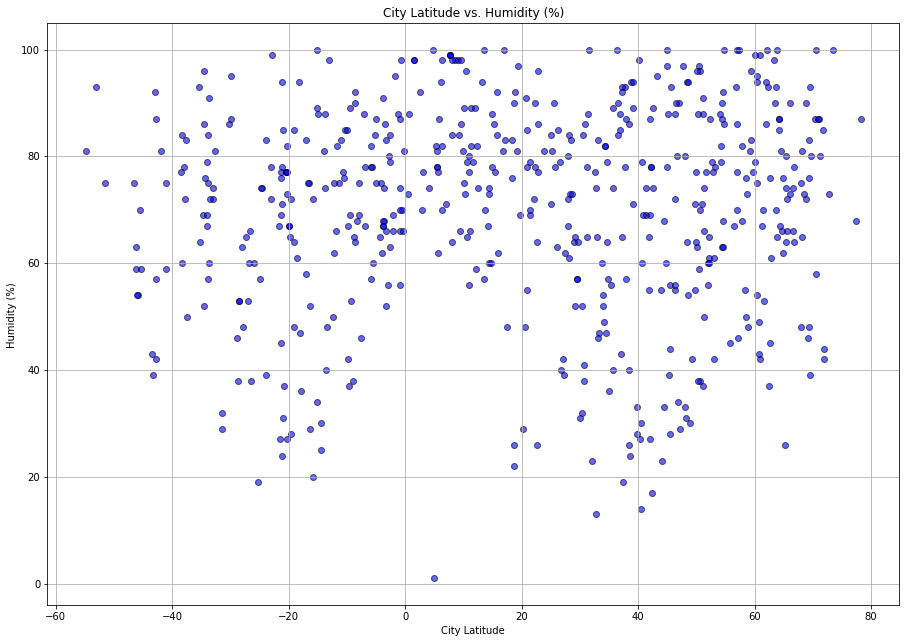

In [161]:
 # Analysis 2: Humidity (%) vs. Latitude
fig, ax = plt.subplots(figsize=(15.27, 10.7))
ax.scatter(weatherPy['Latitude'], weatherPy['Humidity'], c='blue',alpha=.6, linewidth=1, edgecolor='black')

# Create a scatter plot for latitude vs humidity.
ax.set_xlabel("City Latitude")
ax.set_ylabel("Humidity (%) ")
ax.set_title("City Latitude vs. Humidity (%)")

# Save png images for each scatter plot.
plt.savefig("Latitude vs. Humidity (%).png")
plt.grid()
plt.show()

The City Latitude vs. Humidity (%) scatter plot above shows a City's Humidity percentage in relation to it's Latitude. It shows the data points are scattered evenly throughout and does not appear that a city's latitude and humidity have a strong correlation between them.

## Latitude vs. Cloudiness Plot

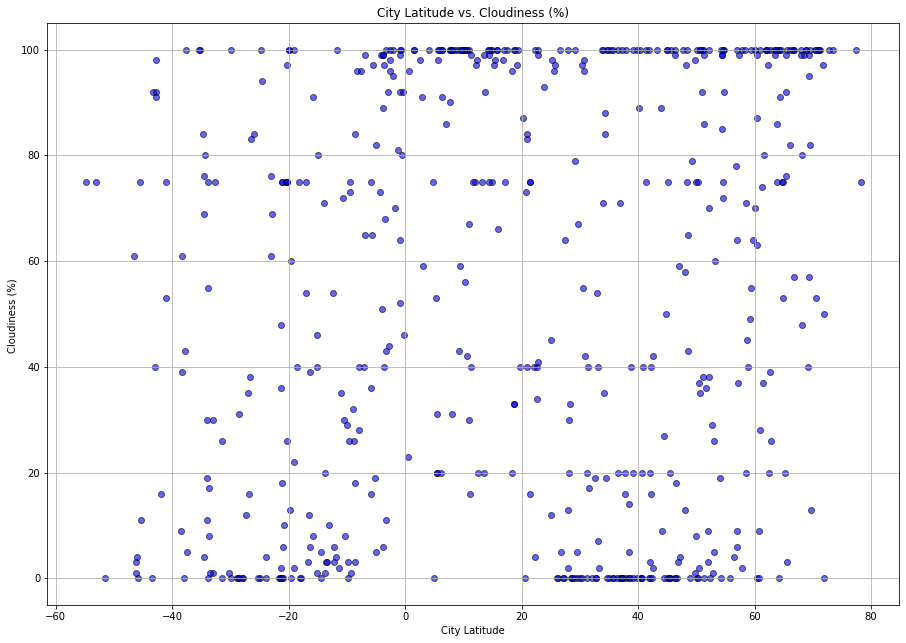

In [162]:
#Analysis 3. Cloudiness (%) vs. Latitude
fig, ax = plt.subplots(figsize=(15.27, 10.7))
ax.scatter(weatherPy['Latitude'], weatherPy['Cloudiness'], c='blue',alpha=.6, linewidth=1, edgecolor='black')

# Create a scatter plot for latitude vs cloudiness.
ax.set_xlabel("City Latitude")
ax.set_ylabel("Cloudiness (%) ")
ax.set_title("City Latitude vs. Cloudiness (%)")

# Save png images for each scatter plot.
plt.savefig("Latitude vs. Cloudiness (%).png")
plt.grid()
plt.show()

The City Latitude vs. Cloudiness (%) scatter plot above shows a City's Cloudiness percentage in relation to it's Latitude. It shows the data points are scattered evenly throughout and does not appear that a city's latitude and cloudiness have a strong correlation between them.

## Latitude vs. Wind Speed Plot

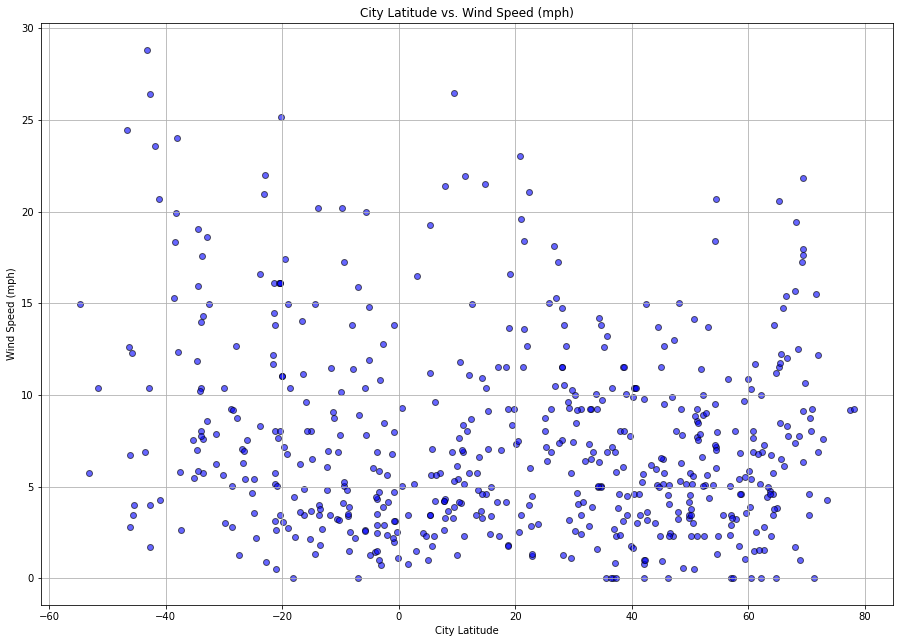

In [163]:
#Analysis 4. Wind Speed (mph) vs. Latitude

fig, ax = plt.subplots(figsize=(15.27, 10.7))
ax.scatter(weatherPy['Latitude'], weatherPy['Wind Speed'], c='blue',alpha=.6, linewidth=1, edgecolor='black')

# Create a scatter plot for latitude vs wind speed.
ax.set_xlabel("City Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("City Latitude vs. Wind Speed (mph)")

# Save png images for each scatter plot.
plt.savefig("Latitude vs. Wind Speed (mph).png")
plt.grid()
plt.show()

The City Latitude vs. Wind Speed (mph) scatter plot above shows a City's Wind Speed in relation to it's Latitude. It shows the data points are scattered evenly throughout and does not appear that a city's latitude and wind speed have a strong correlation between them.

## Linear Regression

In [164]:
# Create a function to create linear regression plots.
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    fig, ax = plt.subplots(figsize=(15.27, 10.7))
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig(f"{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

In [165]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_weatherPy = weatherPy.loc[weatherPy["Latitude"] >= 0]
southern_hemisphere_weatherPy = weatherPy.loc[weatherPy["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4909878733774702
The correlation between both factors is -0.7


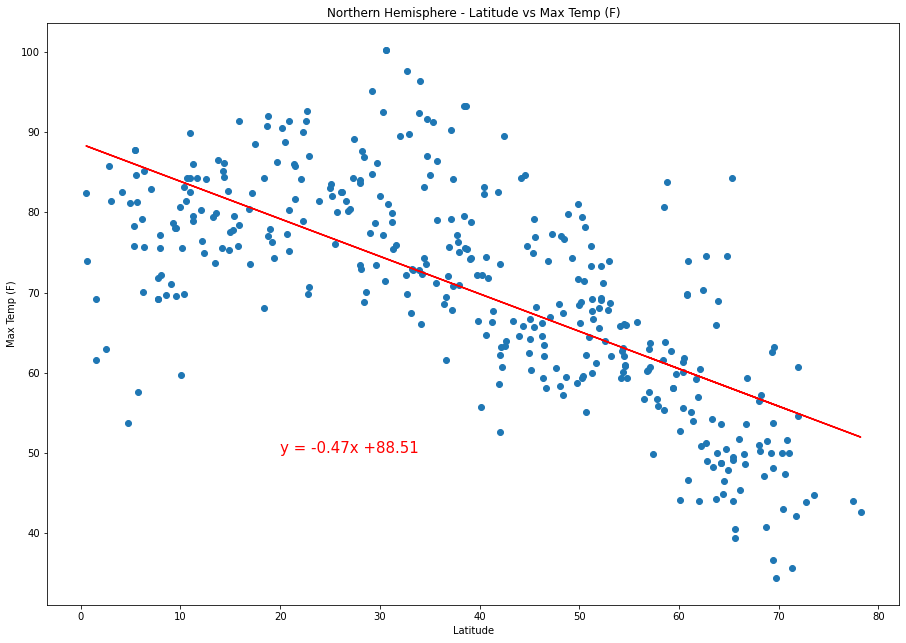

In [166]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weatherPy['Latitude']
y_values = northern_hemisphere_weatherPy['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(20, 50))

The linear regression modeling for latitude vs maximum temperature for the northern hemisphere shows that there is a negative correlation between maximum temperature and latitude. It shows that as you go father north away from the equator (latitude is increasing), the maximum temperature decreases. And, vice versa, the closer you get to the equator away from higher latitudes (latitude is decreasing), the maximum temperature increases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5865962011606695
The correlation between both factors is 0.77


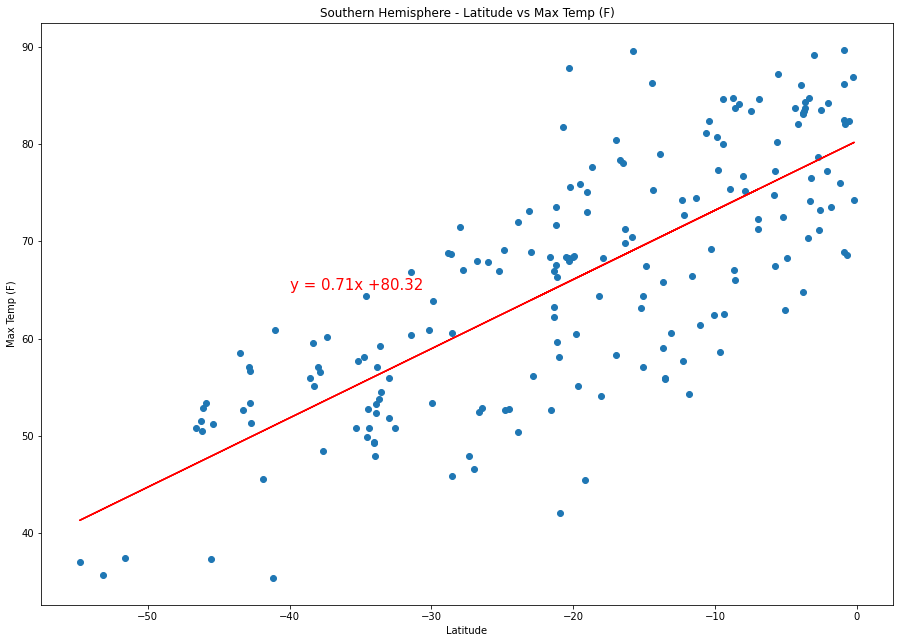

In [167]:
# Create a scatter plot for latitude vs max temp (southern hemisphere)
x_values = southern_hemisphere_weatherPy['Latitude']
y_values = southern_hemisphere_weatherPy['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern",(-40, 65))

The linear regression modeling for latitude vs maximum temperature for the southern hemisphere shows that there is a positive correlation between maximum temperature and latitude. So as you go closer and closer to the equator (latitude is increasing), the max temperature increases. And, vice versa, as you go farther away from the equator (latitude is decreasing), the maximum temperature also decreases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005327813677608908
The correlation between both factors is -0.07


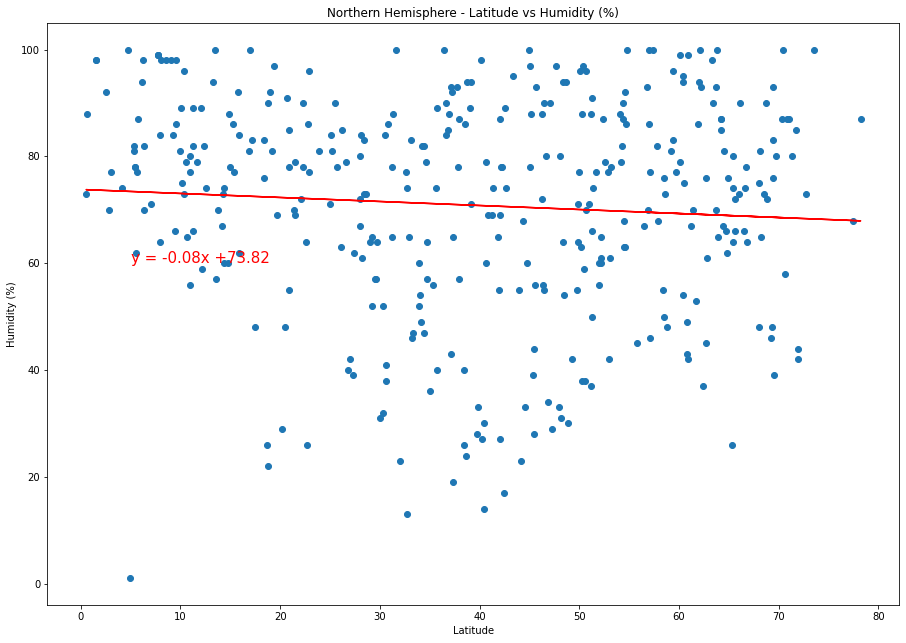

In [168]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weatherPy['Latitude']
y_values = northern_hemisphere_weatherPy['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(5, 60))

The linear regression modeling for latitude vs humidity for the northern hemisphere shows that there is a negative correlation between humidity and latitude. So as latitude increases (you are moving farther away from the equator), the humidity level decreases. We can tell that the humidity level doesn't decrease by much by the small slope of the linear regression line. Also the opposite is also true. As we move closer to the equator (latitude is decreasing), the humidity level increases.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006394479558074607
The correlation between both factors is 0.08


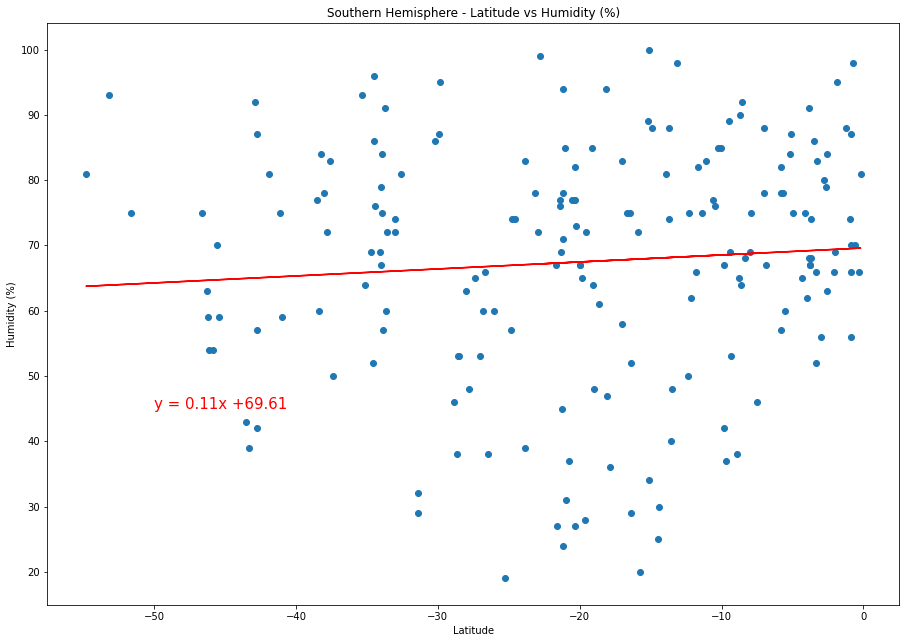

In [169]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = southern_hemisphere_weatherPy['Latitude']
y_values = southern_hemisphere_weatherPy['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(-50, 45))

The linear regression modeling for latitude vs humidity for the southern hemisphere shows that there is a positive correlation between humidity and latitude. That is, as latitude increases (you are moving closer to the equator), the humidity level increases. We can tell that the humidity level doesn't increase by much by the small slope of the linear regression line. In addition, the opposite is also true. As we move farther away from the equator (latitude is decreasing), the humidity level decreases but not by very much.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0030800234027829223
The correlation between both factors is 0.06


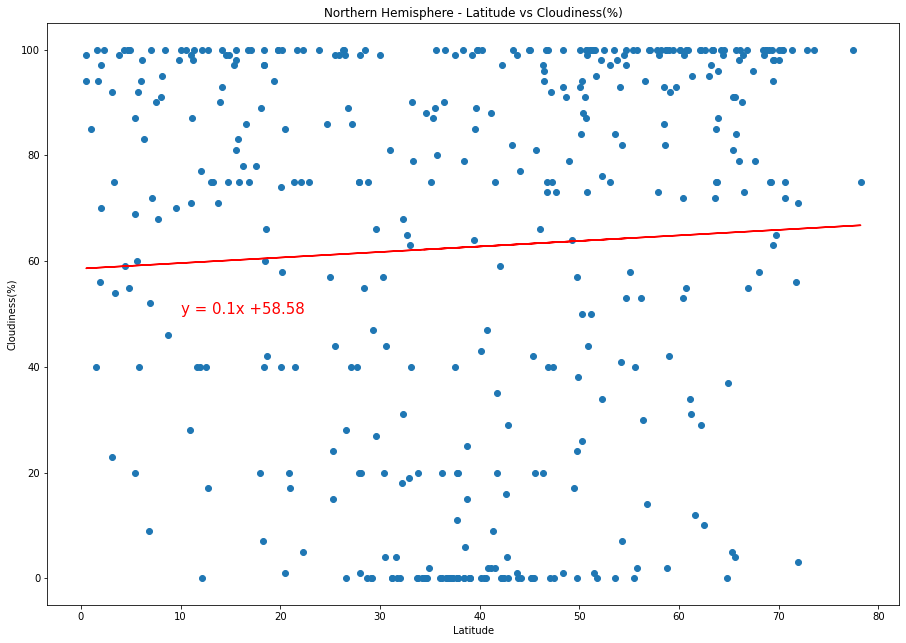

In [127]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weatherPy['Latitude']
y_values = northern_hemisphere_weatherPy['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(10, 50))

The linear regression modeling for latitude vs cloudiness for the northern hemisphere shows that there is a positive correlation between latitude and cloudiness. So as you move farther away from the equator (latitude increases) the cloudiness level increases.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04869908051191087
The correlation between both factors is 0.22


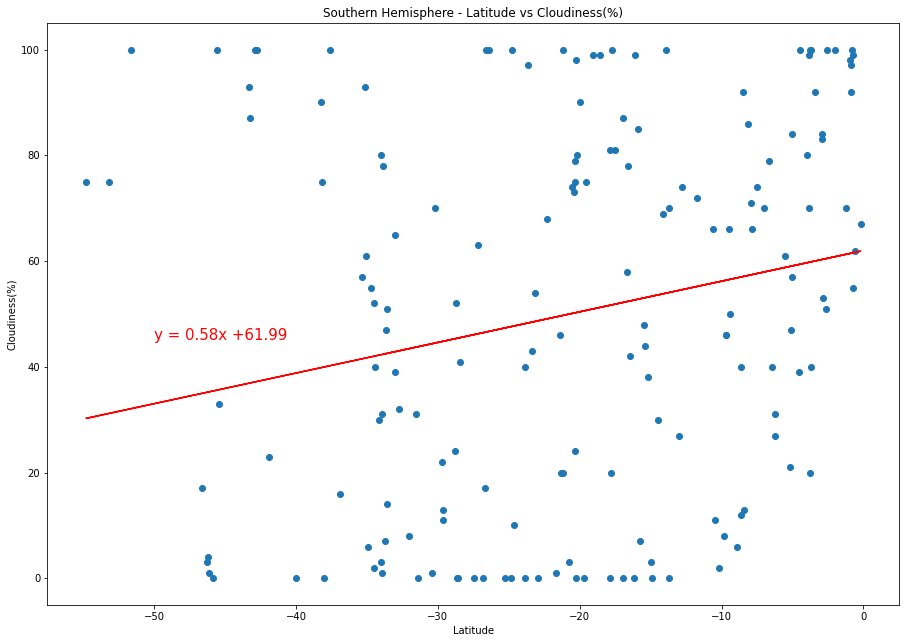

In [130]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weatherPy['Latitude']
y_values = southern_hemisphere_weatherPy['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-50, 45))

The linear regression modeling for  latitude vs cloudiness for the southern hemisphere shows that there is a positive correlation between latitude and cloudiness. So as you move farther away from the equator (latitude decreases) the cloudiness level increases. Also, it is important to note that although there is a weak correlation for the southern hemisphere, the correlation between cloudiness and latitude is a bit more stronger for the southern hemisphere than for the same factors for the northern hemisphere. As a final note since both the Northern and Southern linear regression models both have a positive correlation this seems to indicate that latitude does not seem to affect or have an influence on how cloudy it is.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00018828167399512495
The correlation between both factors is -0.01


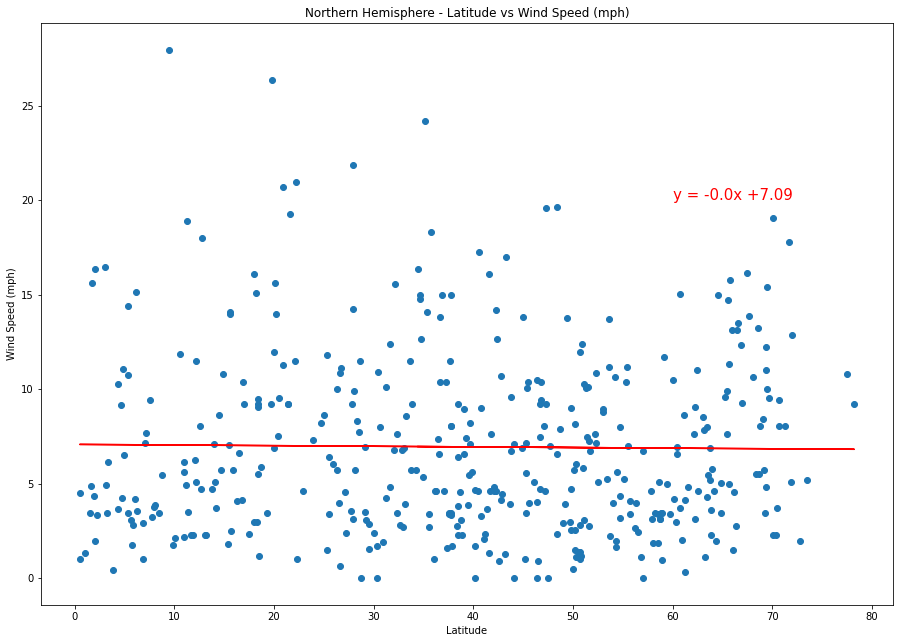

In [135]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weatherPy['Latitude']
y_values = northern_hemisphere_weatherPy['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(60, 20))

The linear regression modeling for latitude vs wind speed for the northern hemisphere shows that there is no positive or negative correlation for wind speed and latitude. So as you go farther north away from the equator (latitude is increasing) or as you go towards the equator (latitude is decreasing), it appears as if latitude does not have much of any effect on the wind speed for cities.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07772351047855815
The correlation between both factors is -0.28


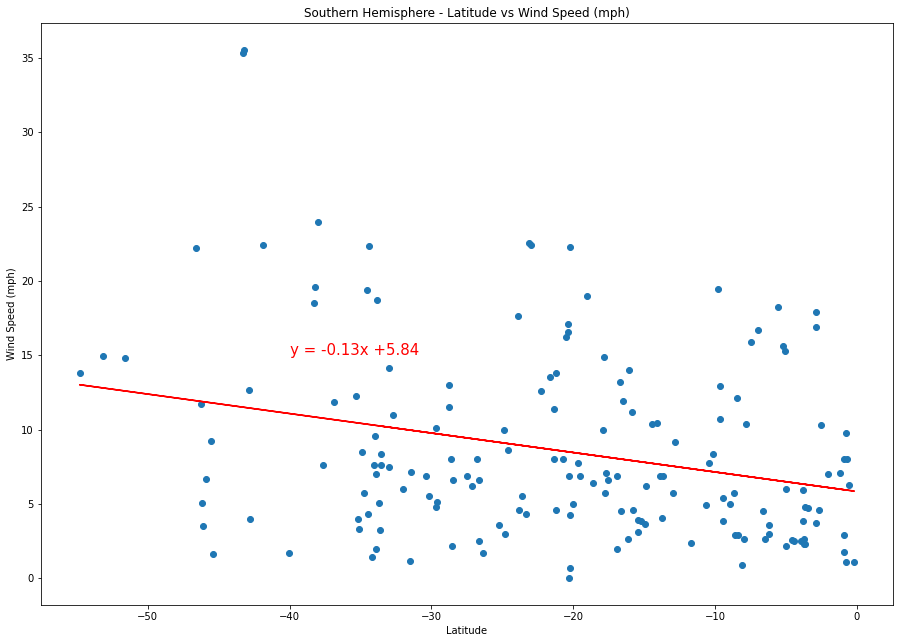

In [137]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weatherPy['Latitude']
y_values = southern_hemisphere_weatherPy['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 15))

The linear regression modeling for latitude vs wind speed for the southern hemisphere shows that there is a negative correlation for wind speed and latitude. So as you go farther south away from the equator (latitude is decreasing), wind speed increases and as you go towards the equator (latitude is increasing), wind speed decreases. It also seems that the correlation between these two factors for the southern hemisphere is stronger than the correlation between these two factors for the northern hemisphere.

# Observable Trends Based on the Data
### - There is a negative correlation between a city's latitude and maximum temperature in the northern hemisphere. That is, as you go farther away from the equator (latitude increases), a city's maximum temperature will generally be lower than cities closer to the equator in the northern hemisphere. This is what I expected to see - for example, it's a lot colder in Minnesota (farther north) than it is in Mexico.
### - There is no correlation between cloudiness and a city's latitude for both the northern and southern hemispheres. This is represented in the scatter plots in this notebook for those two factors as the data points being scattered across the graph and the linear regresion modeling for both the Northern and Southern hemisphere show a positive correlation. As a result, we can conclude that a city's latitude has little to no influence on how cloudy a city is.
### - There is a very weak, negative correlation for the northern hemisphere between a city's latitude and humidity, and there is a very weak, positive correlation for the southern hemisphere for those same two factors. Overall, for both hemispheres, latitude appears to have a small influence on humidity but not very much. However, since the overall scatterplot for both the northern and southern hemisphere shows data points evenly distributed I believe it's more accurate to say that a city's latitude has little to no influnce on the humidity level a city has.